<a href="https://colab.research.google.com/github/wandb/examples/blob/master/colabs/scikit/Simple_Scikit_Integration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://wandb.me/logo-im-png" width="400" alt="Weights & Biases" />

# 🏋️‍♀️ W&B + 🧪 Scikit-learn
Use Weights & Biases for machine learning experiment tracking, dataset versioning, and project collaboration.

<div><img /></div>

<img src="https://wandb.me/mini-diagram" width="650" alt="Weights & Biases" />

<div><img /></div>
<!--- @wandbcode{simple-sklearn} -->

## What this notebook covers
* Easy integration of Weights and Biases with Scikit. 
* W&B Scikit plots for model interpretation and diagnostics for regression, classification, and clustering.

**Note**: Sections starting with _Step_ are all you need to integrate W&B to existing code.



In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn import datasets, cluster

from sklearn.datasets import load_boston
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight

## Step 0: Install W&B

In [ ]:
%%capture
!pip install wandb

## Step 1: Import W&B and Login

In [ ]:
import wandb

wandb.login()

# Regression

**Let's check out a quick example**

In [ ]:
# Load data
boston = load_boston()
X = pd.DataFrame(boston.data, columns=boston.feature_names)
X = X.values
y = boston.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train model, get predictions
reg = Ridge()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

## Step 2: Initialize W&B run

In [ ]:
run = wandb.init(project='my-scikit-integration')

## Step 3: Visualize model performance

### Residual Plot

Measures and plots the predicted target values (y-axis) vs the difference between actual and predicted target values (x-axis), as well as the distribution of the residual error.

Generally, the residuals of a well-fit model should be randomly distributed because good models will account for most phenomena in a data set, except for random error.

[Check out the official documentation here $\rightarrow$](https://docs.wandb.com/library/integrations/scikit#residuals-plot)


In [ ]:
wandb.sklearn.plot_residuals(reg, X_train, y_train)

### Outlier Candidate

Measures a datapoint's influence on regression model via Cook's distance. Instances with heavily skewed influences could potentially be outliers. Useful for outlier detection.

[Check out the official documentation here $\rightarrow$](https://docs.wandb.com/library/integrations/scikit#outlier-candidates-plot)

In [ ]:
wandb.sklearn.plot_outlier_candidates(reg, X_train, y_train)

## All-in-one: Regression plot

Using this all in one API one can:
* Log summary of metrics
* Log learning curve
* Log outlier candidates
* Log residual plot

In [ ]:
wandb.sklearn.plot_regressor(reg, X_train, X_test, y_train, y_test, model_name='Ridge')

# Classification

**Let's check out a quick example.**

In [ ]:
data_url = "https://raw.githubusercontent.com/wandb/examples/master/examples/data/wine.csv"
!wget {data_url} -O "wine.csv"

In [ ]:
# Load data
wine_quality = pd.read_csv("wine.csv")
y = wine_quality["quality"]
y = y.values
X = wine_quality.drop(["quality"], axis = 1)
X = X.values
feature_names=wine_quality.columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
labels = ['one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'ten']

# Train model, get predictions
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_probas = model.predict_proba(X_test)
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

## Step 2: Initialize W&B run

In [ ]:
run = wandb.init(project='my-scikit-integration')

## Step 3: Visualize model performance

### Class Proportions

Plots the distribution of target classes in training and test sets. Useful for detecting imbalanced classes and ensuring that one class doesn't have a disproportionate influence on the model.

[Check out the official documentation here $\rightarrow$](https://docs.wandb.com/library/integrations/scikit#class-proportions)

In [ ]:
wandb.sklearn.plot_class_proportions(y_train, y_test, labels)

### Learning Curve

Trains model on datasets of varying lengths and generates a plot of cross validated scores vs dataset size, for both training and test sets.

[Check out the official documentation here $\rightarrow$](https://docs.wandb.com/library/integrations/scikit#learning-curve)

In [ ]:
wandb.sklearn.plot_learning_curve(model, X_train, y_train)

### ROC

ROC curves plot true positive rate (y-axis) vs false positive rate (x-axis). The ideal score is a `TPR = 1` and `FPR = 0`, which is the point on the top left. Typically we calculate the area under the ROC curve (AUC-ROC), and the greater the AUC-ROC the better.

[Check out the official documentation here $\rightarrow$](https://docs.wandb.com/library/integrations/scikit#roc)

In [ ]:
wandb.sklearn.plot_roc(y_test, y_probas, labels)

### Precision Recall Curve

Computes the tradeoff between precision and recall for different thresholds. A high area under the curve represents both high recall and high precision, where high precision relates to a low false positive rate, and high recall relates to a low false negative rate.

[Check out the official documentation here $\rightarrow$](https://docs.wandb.com/library/integrations/scikit#precision-recall-curve)

In [ ]:
wandb.sklearn.plot_precision_recall(y_test, y_probas, labels)

### Feature Importances

Evaluates and plots the importance of each feature for the classification task. Only works with classifiers that have a `feature_importances_` attribute, like trees.

[Check out the official documentation here $\rightarrow$](https://docs.wandb.com/library/integrations/scikit#feature-importances)

In [ ]:
wandb.sklearn.plot_feature_importances(model);

## All-in-one: Classifier Plot

Using this all in one API one can:
* Log feature importance
* Log learning curve
* Log confusion matrix
* Log summary metrics
* Log class proportions
* Log calibration curve
* Log roc curve
* Log precision recall curve

In [ ]:
wandb.sklearn.plot_classifier(model, 
                              X_train, X_test, 
                              y_train, y_test, 
                              y_pred, y_probas, 
                              labels, 
                              False, 
                              'RandomForest')

# Clustering

In [ ]:
# Load data
iris = datasets.load_iris()
X = iris.data
y = iris.target
names = iris.target_names

def get_label_ids(classes):
    return np.array([names[aclass] for aclass in classes])
labels = get_label_ids(y)

# Train model
kmeans = KMeans(n_clusters=4, random_state=1)
cluster_labels = kmeans.fit_predict(X)

## Step 2: Initialize W&B run

In [ ]:
run = wandb.init(project='my-scikit-integration')

## Step 3: Visualize model performance

### Elbow Plot

Measures and plots the percentage of variance explained as a function of the number of clusters, along with training times. Useful in picking the optimal number of clusters.

[Check out the official documentation here $\rightarrow$](https://docs.wandb.com/library/integrations/scikit#elbow-plot)

In [ ]:
wandb.sklearn.plot_elbow_curve(kmeans, X)

### Silhouette Plot

Measures & plots how close each point in one cluster is to points in the neighboring clusters. The thickness of the clusters corresponds to the cluster size. The vertical line represents the average silhouette score of all the points.

[Check out the official documentation here $\rightarrow$](https://docs.wandb.com/library/integrations/scikit#silhouette-plot)

In [ ]:
wandb.sklearn.plot_silhouette(kmeans, X, labels)

## All in one: Clusterer Plot

Using this all in one API one can:
* Log elbow curve
* Log silhouette plot

In [ ]:
wandb.sklearn.plot_clusterer(kmeans, X, cluster_labels, labels, 'KMeans')

# Visualize Results

Click on the **project page** link above to see your live results.

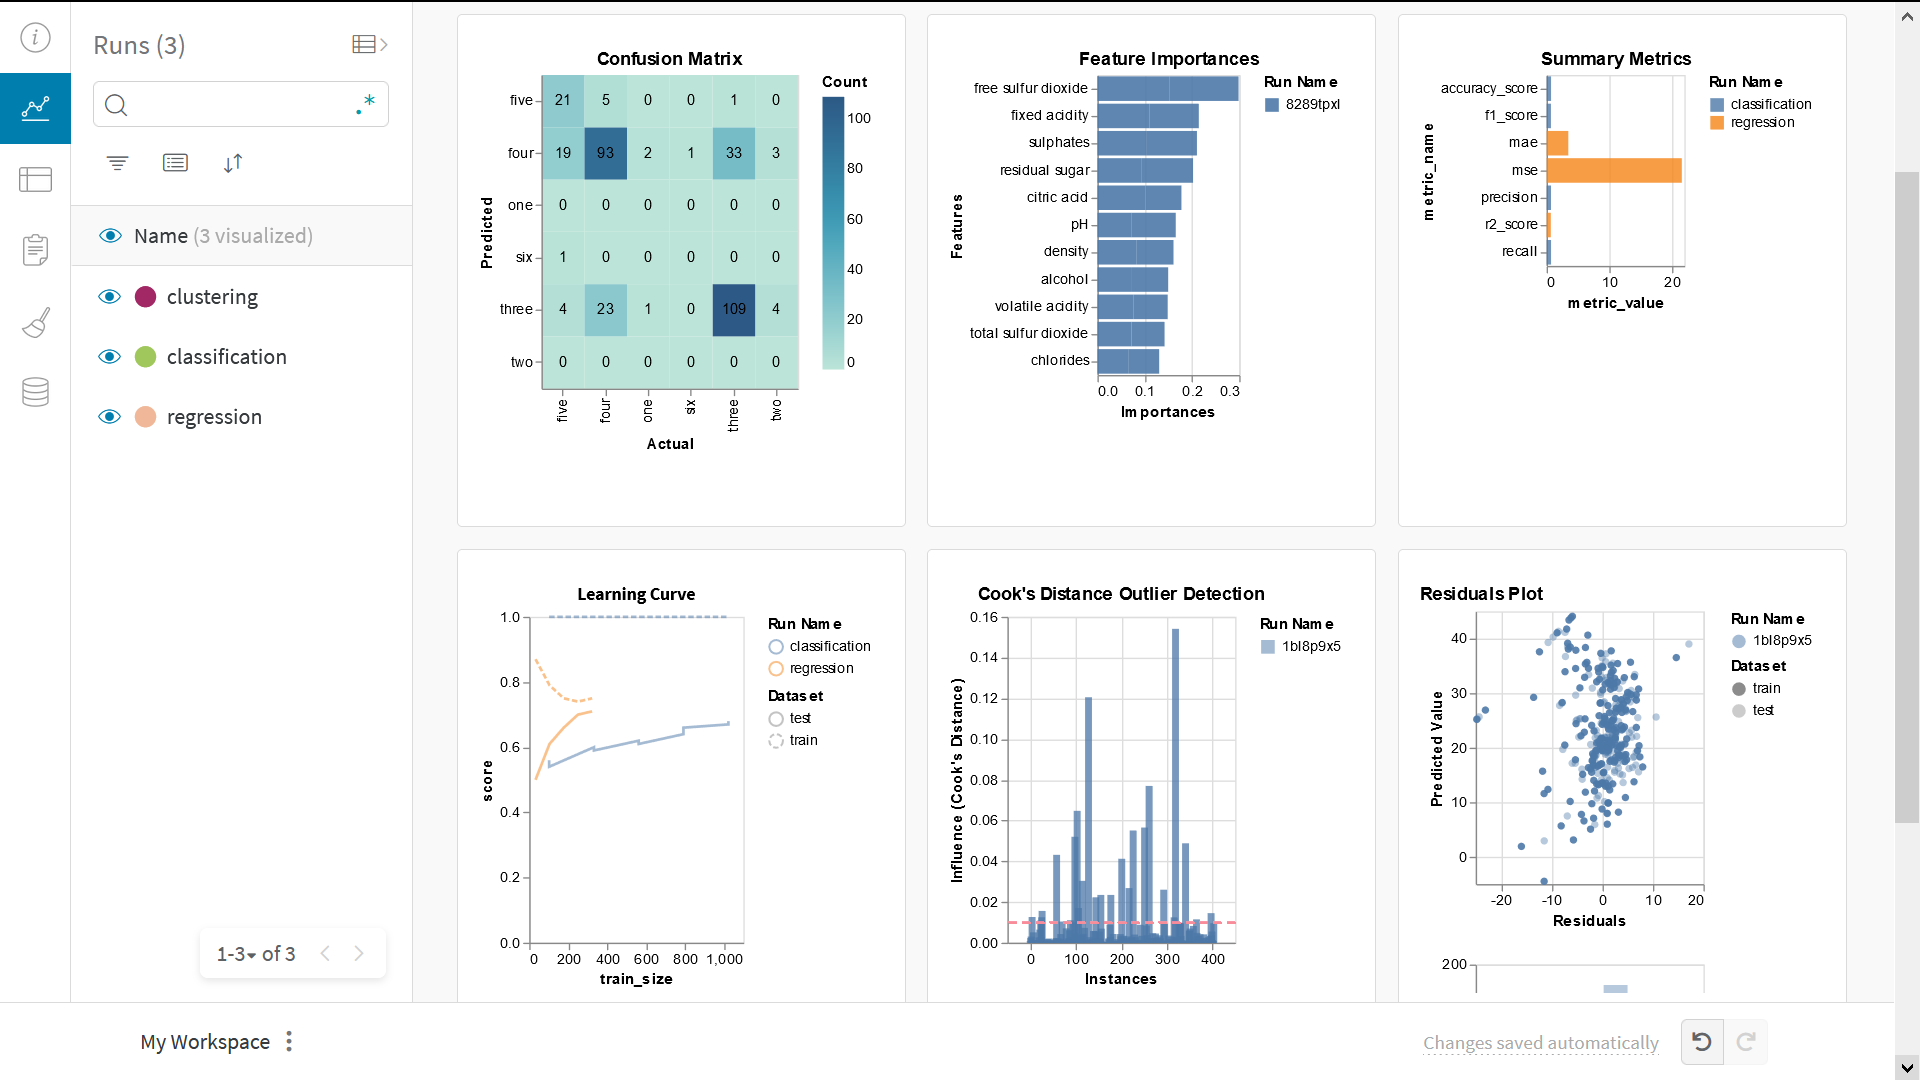

# Sweep 101

Use Weights & Biases Sweeps to automate hyperparameter optimization and explore the space of possible models.

## [Check out Hyperparameter Optimization in PyTorch using W&B Sweeps $\rightarrow$](http://wandb.me/sweeps-colab)

Running a hyperparameter sweep with Weights & Biases is very easy. There are just 3 simple steps:

1. **Define the sweep:** We do this by creating a dictionary or a [YAML file](https://docs.wandb.com/library/sweeps/configuration) that specifies the parameters to search through, the search strategy, the optimization metric et all.

2. **Initialize the sweep:** 
`sweep_id = wandb.sweep(sweep_config)`

3. **Run the sweep agent:** 
`wandb.agent(sweep_id, function=train)`

And voila! That's all there is to running a hyperparameter sweep! In the notebook below, we'll walk through these 3 steps in more detail.

<img src="https://imgur.com/sdQXdDz.png" alt="Sweep Result" />


# Example Gallery

See examples of projects tracked and visualized with W&B in our gallery, [Fully Connected →](https://wandb.me/fc)

# Basic Setup
1. **Projects**: Log multiple runs to a project to compare them. `wandb.init(project="project-name")`
2. **Groups**: For multiple processes or cross validation folds, log each process as a runs and group them together. `wandb.init(group='experiment-1')`
3. **Tags**: Add tags to track your current baseline or production model.
4. **Notes**: Type notes in the table to track the changes between runs.
5. **Reports**: Take quick notes on progress to share with colleagues and make dashboards and snapshots of your ML projects.

# Advanced Setup
1. [Environment variables](https://docs.wandb.com/library/environment-variables): Set API keys in environment variables so you can run training on a managed cluster.
2. [Offline mode](https://docs.wandb.com/library/technical-faq#can-i-run-wandb-offline): Use `dryrun` mode to train offline and sync results later.
3. [On-prem](https://docs.wandb.com/self-hosted): Install W&B in a private cloud or air-gapped servers in your own infrastructure. We have local installations for everyone from academics to enterprise teams.